In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [4]:
def drawGraph(yValue):
  plt.plot(history.history[yValue])
  plt.xlabel('epoch')
  plt.ylabel(yValue)
  plt.show()

In [5]:
def drawLossGraph():
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'])
  plt.show()

In [6]:
model = model_fn()
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)             #fit() 메서드는 History 클래스 객체를 반환함, verbose는 훈련 과정 출력을 조정(0: 미출력, 1: 진행 막대 포함, 2: 진행 막대 미포함)
print(history.history.keys())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
dict_keys(['loss', 'accuracy'])


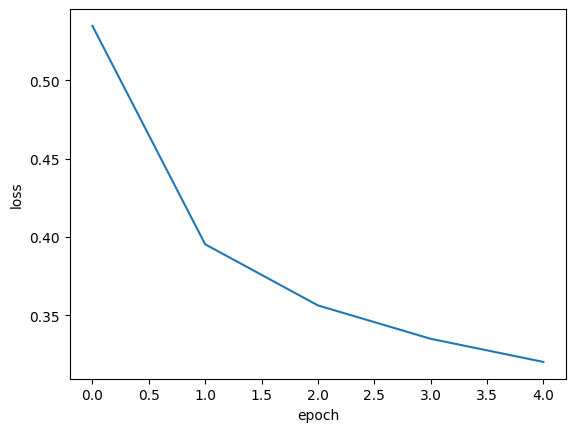

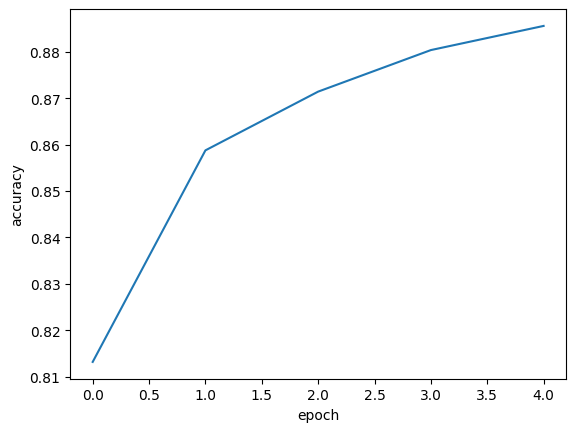

In [7]:
drawGraph('loss')
drawGraph('accuracy')

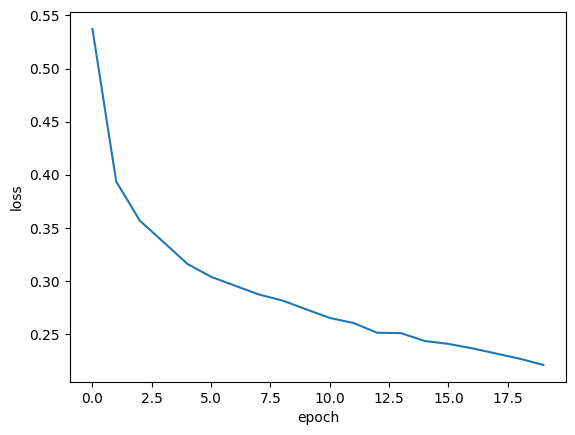

In [8]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
drawGraph('loss')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


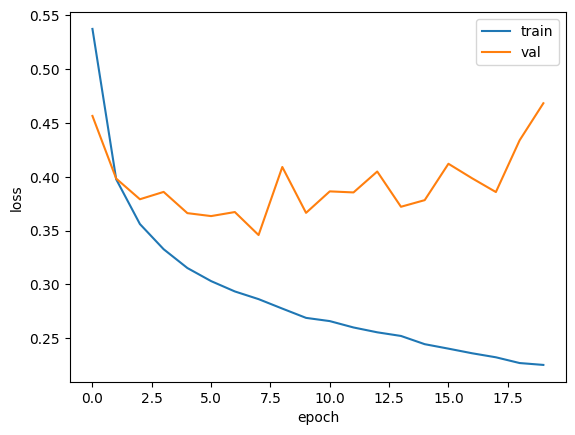

In [9]:
#검증 손실 계산 (RMSProp)
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data = (val_scaled, val_target))
print(history.history.keys())
drawLossGraph()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


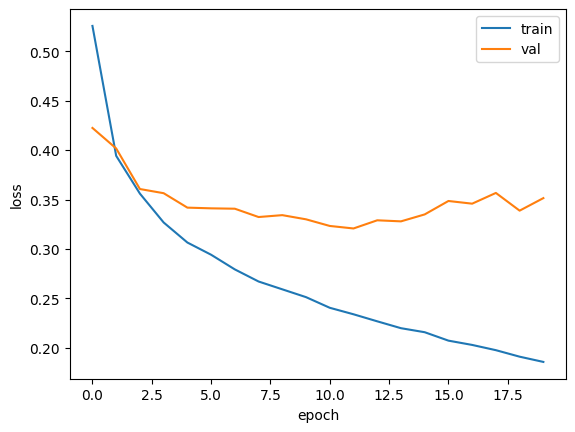

In [10]:
#Adam 모델 사용
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data = (val_scaled, val_target))
print(history.history.keys())
drawLossGraph()

**드롭아웃**<br>
훈련 과정에서 일부 뉴런을 랜덤하게 꺼서 (출력을 0으로 만들어) 과대적합을 막는 방법<br>
평가 및 예측 수행 시 드롭아웃을 적용하지 않음

In [11]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


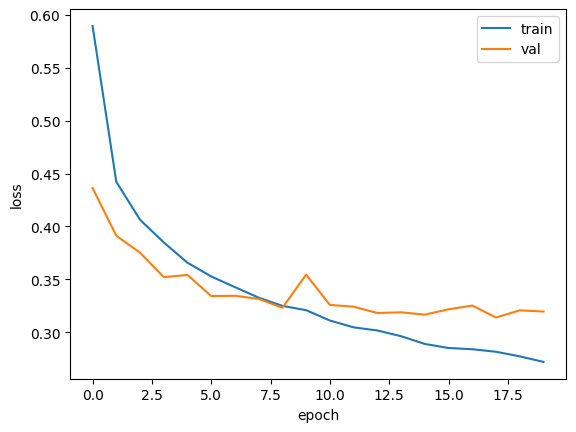

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data = (val_scaled, val_target))
drawLossGraph()

In [13]:
#모델 저장하기
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data = (val_scaled, val_target))
model.save_weights('model-weights.h5')                                            #모델 파라미터 저장
model.save('model-whole.h5')                                                      #모델 구조 & 모델 파라미터 저장

!ls -al *.h5

-rw-r--r-- 1 root root 333320 Nov 26 11:59 model-weights.h5
-rw-r--r-- 1 root root 981176 Nov 26 11:59 model-whole.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
#모델 불러오기
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5') #load_weights를 사용하려면 save_weights로 저장했던 모델과 동일한 구조를 가져야 함

val_labels = np.argmax(model.predict(val_scaled), axis=-1) # model.predict에서 가장 큰 값 (예측한 값)을 val_labels로 저장
print(np.mean(val_labels == val_target)) # 정확도 출력

model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step
0.8773333333333333
375/375 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8773


[0.33474165201187134, 0.8773333430290222]

**콜백**<br>
훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체

In [18]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5') #최상의 검증 점수를 만드는 모델 저장
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8862


[0.3258533179759979, 0.8861666917800903]

**조기 종료**<br>
과대적합이 시작되기 전에 훈련을 미리 중지하는 것

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5') #최상의 검증 점수를 만드는 모델 저장
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) #patience=2: 2번 연속 검증 점수 향상이 안 되면 훈련 중지
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

print(early_stopping_cb.stopped_epoch)
drawLossGraph()
model.evaluate(val_scaled, val_target)